# 데이타 로딩

In [ ]:
!pip install -q tensorflow-datasets tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('beans', split='train', shuffle_files=True)

In [ ]:
data = next(ds.shuffle(32).batch(9999999).as_numpy_iterator())
image, label = data['image'], data['label']
print(image.shape)
print(label.shape)

(1034, 500, 500, 3)
(1034,)


0


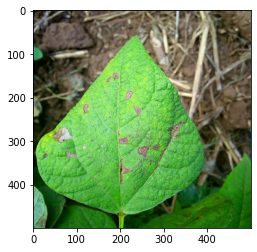

0


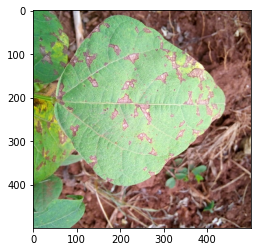

2


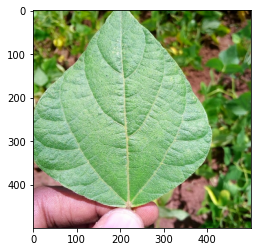

1


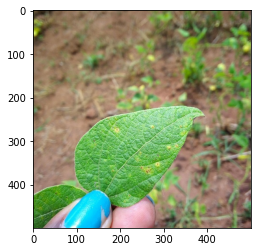

1


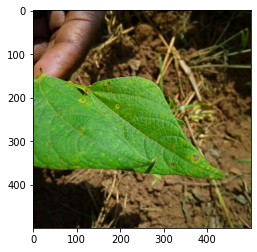

[0 0 2 1 1 1 1 2 1 0]


In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  print(label[i])
  plt.imshow(image[i])
  plt.show()

print(label[:10])

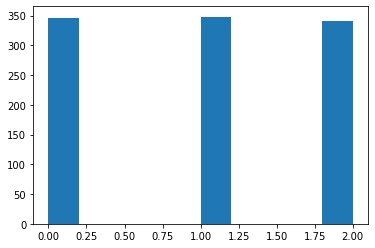

In [ ]:
plt.hist(label)
plt.show()

# CIFAR10 적용


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape

import time

In [ ]:
i = int(len(image)*0.8)

raw_train_x, raw_test_x = image[:i], image[i:]
raw_train_y, raw_test_y = label[:i], label[i:]

In [ ]:
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

(827, 500, 500, 3)
(827,)
(207, 500, 500, 3)
(207,)


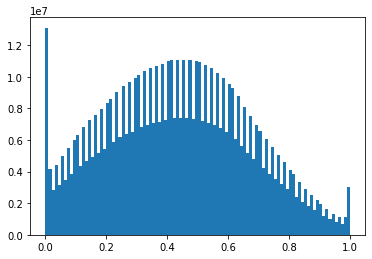

In [ ]:
plt.hist(train_x.flatten(), bins=100)
plt.show()

2 C


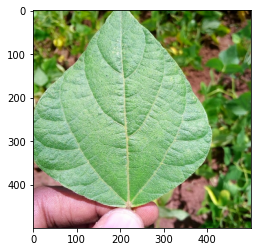

0 A


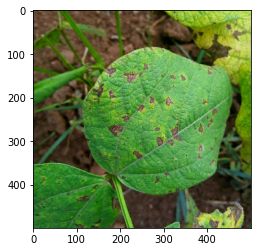

1 B


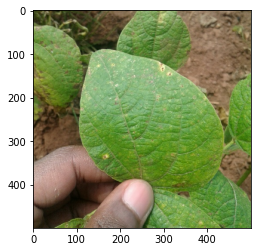

0 A


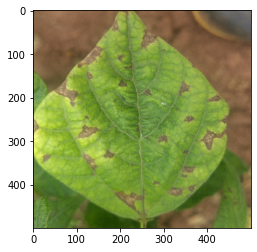

In [ ]:
# labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
labels = ['A', 'B', 'C']
def show_sample(i):
  # print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  print(raw_train_y[i], labels[raw_train_y[i]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [ ]:
print(train_y[:50])

[0 0 2 1 1 1 1 2 1 0 0 0 1 1 0 0 1 0 0 0 1 2 0 2 1 1 2 2 1 1 0 2 1 2 0 0 1
 1 1 2 1 0 0 1 2 1 1 0 1 1]


In [ ]:
model = keras.Sequential()
# model.add(Input((32,32,3)))
model.add(Input((500,500,3)))
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(10, activation='softmax'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="AdaDelta", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
hist = model.fit(train_x, train_y, epochs=50, verbose=1, batch_size=16, validation_split=0.2)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 500, 500, 32)      2432      
                                                                 
 conv2d_97 (Conv2D)          (None, 500, 500, 32)      25632     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 250, 250, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 250, 250, 64)      51264     
                                                                 
 conv2d_99 (Conv2D)          (None, 250, 250, 64)      102464    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 125, 125, 64)     0         
 g2D)                                                